In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
#read the datasets from .csv
diet_df = pd.read_csv('diet_clean.csv')
stats_df = pd.read_csv('data_clean.csv')

In [3]:
print('DIET')
print(diet_df.head(5))
print('STATISTICS')
print(stats_df.head(5))

DIET
       Дата           Назва  Вага (грам)  Калорії         Час
0  02.03.18          Гречка        200.0    178.0  Сніданок 1
1  02.03.18  Консерва рибна        230.0    506.0  Сніданок 1
2  02.03.18      Хліб білий         40.0    104.8  Сніданок 1
3  02.03.18          Яблуко        200.0    104.0  Сніданок 1
4  02.03.18             Рис        100.0    111.0        Обід
STATISTICS
        Day  Weight  Calories  Proteins     Fats    Carbs  Training  My weight
0  02.03.18  2120.0   2139.00   76.0550  107.930  262.630         1       96.0
1  03.03.18  2136.0   1961.62   90.4340  131.138  192.769         0       96.0
2  04.03.18  1865.0   1783.80   80.0125   83.774  202.373         1       95.0
3  05.03.18  1870.0   1656.75   76.1850   61.410  204.835         0       94.0
4  06.03.18  1847.0   1863.28  116.8775   69.864  175.678         0       93.5


In [4]:
#creating indeces from dates (rejected because after this transformation, the dates will be lost after while transforming data to arrays)
#diet_df.index = diet_df['Дата']
#del diet_df['Дата']
#diet_df.loc['02.03.18'][:3]

In [5]:
stats_df.head()

,Day,Weight,Calories,Proteins,Fats,Carbs,Training,My weight
0,02.03.18,2120.0,2139.00,76.0550,107.930,262.630,1,96.0
1,03.03.18,2136.0,1961.62,90.4340,131.138,192.769,0,96.0
2,04.03.18,1865.0,1783.80,80.0125,83.774,202.373,1,95.0
3,05.03.18,1870.0,1656.75,76.1850,61.410,204.835,0,94.0
4,06.03.18,1847.0,1863.28,116.8775,69.864,175.678,0,93.5


In [6]:
diet_df.head()

,Дата,Назва,Вага (грам),Калорії,Час
0,02.03.18,Гречка,200.0,178.0,Сніданок 1
1,02.03.18,Консерва рибна,230.0,506.0,Сніданок 1
2,02.03.18,Хліб білий,40.0,104.8,Сніданок 1
3,02.03.18,Яблуко,200.0,104.0,Сніданок 1
4,02.03.18,Рис,100.0,111.0,Обід


In [7]:
#transform categorical features 'Назва' and 'Час' to one-hot vector
diet_oh = pd.get_dummies(diet_df[['Назва','Час']])
diet_oh.head()

,Назва_Ікра кабачкова,Назва_Аджика домашня,Назва_Балик свинина,Назва_Банан,Назва_Батон,Назва_Биток смажений,Назва_Блінчик з вареням,Назва_Блінчик з творогом,Назва_Борщ,Назва_Борщ з щавлем,...,Назва_Яблуко,Назва_Язик говяжий,Назва_Яйце,Назва_Яловичина тушена,Назва_Яєчня з куркою філе,Назва_меню,Час_Вечеря,Час_Обід,Час_Сніданок 1,Час_Сніданок 2
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [8]:
#adding the data that was not transformed
diet_oh[['Дата', 'Вага (грам)', 'Калорії', 'Час']] = diet_df[['Дата', 'Вага (грам)', 'Калорії', 'Час']]

In [9]:
diet_oh.head()

,Назва_Ікра кабачкова,Назва_Аджика домашня,Назва_Балик свинина,Назва_Банан,Назва_Батон,Назва_Биток смажений,Назва_Блінчик з вареням,Назва_Блінчик з творогом,Назва_Борщ,Назва_Борщ з щавлем,...,Назва_Яєчня з куркою філе,Назва_меню,Час_Вечеря,Час_Обід,Час_Сніданок 1,Час_Сніданок 2,Дата,Вага (грам),Калорії,Час
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,02.03.18,200.0,178.0,Сніданок 1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,02.03.18,230.0,506.0,Сніданок 1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,02.03.18,40.0,104.8,Сніданок 1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,02.03.18,200.0,104.0,Сніданок 1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,02.03.18,100.0,111.0,Обід


In [10]:
#creating numpy arrays from pandas dataframes
stats = stats_df.as_matrix()
diet = diet_oh.as_matrix()

In [11]:
print('stats shape = ', stats.shape)
print('diet shape = ', diet.shape)

stats shape =  (78, 8)
diet shape =  (1124, 193)


In [12]:
stats[0,:]

array(['02.03.18', 2120.0, 2139.0, 76.055, 107.93, 262.63, 1, 96.0], dtype=object)

In [13]:
#Add a column about weight loss
m = stats.shape[0]
loss = np.zeros((m,1))
for i in range(1,m):
    loss[i] = stats[i,-1] - stats[i-1,-1]
    
#Add mean of two previous days' weight
mean_w = np.zeros((m,1))
mean_w[0] = stats[0,-1]
mean_w[1] = stats[1,-1]
for i in range(2,m):
    mean_w[i] = (stats[i-1,-1] + stats[i-2,-1])/2
    
print(mean_w[:5])

[[ 96. ]
 [ 96. ]
 [ 96. ]
 [ 95.5]
 [ 94.5]]


In [14]:
print(stats.shape)
print(loss.shape)
stats = np.concatenate((stats, mean_w), axis=1)

(78, 8)
(78, 1)


In [15]:
print(stats.shape)
X = stats[:, 1:]
y = loss
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=2)
print(X_train.shape)
lr = LinearRegression()
#lr.fit(X_train, y_train)
#y = lr.predict(X_test)
#print(lr.score(X_test, y_test))
predicted = cross_val_predict(lr, X_test, y_test, cv=10)


(78, 9)
(50, 8)


In [16]:
mean_squared_error(y_test, predicted)

0.03826210827297509

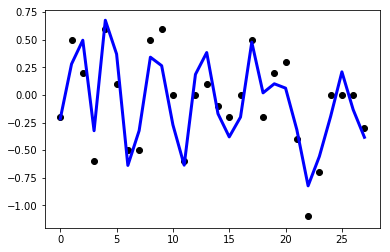

In [17]:
plt.scatter(range(y_test.shape[0]), y_test,  color='black')
plt.plot(range(y_test.shape[0]), predicted, color='blue', linewidth=3)
plt.show()
plt.close()